In [9]:
# revisione dell'esempio 1 relativo
# alla rete LeNet5, applicando
# la batch normalization

# importazione librerie necessarie
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import tensorflow.keras as keras

# download dataset e normalizzazione
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# conversione in float32 da int8 del dataset originale
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# normalizzazione nell'intervallo [0, 1]
x_train /= 255
x_test /= 255

# one-hot encoding delle label
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Reshape del dataset (era un array monodimensionale)
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1)

In [10]:
#
# definizione del modello LeNet-5
#

# creazione del modello 
model = Sequential()

# C1 Convolutional Layer
model.add(layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(28,28,1), padding='same'))

# S2 Pooling Layer
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))

# aggiunto layer di batch normalization
model.add(layers.BatchNormalization())

# C3 Convolutional Layer
model.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))

# S4 Pooling Layer
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# aggiunto layer di batch normalization
model.add(layers.BatchNormalization())

# C5 Convolutional Layer
model.add(layers.Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))

# aggiunto layer di batch normalization
model.add(layers.BatchNormalization())

# Appiattimento dei dati dei layer convolutivi per poterli usare nei seguenti layer pienamente connessi
model.add(layers.Flatten())

# FC6 Fully Connected Layer
model.add(layers.Dense(84, activation='tanh'))

# aggiunto layer di batch normalization
model.add(layers.BatchNormalization())

# Output Layer con attivazione di tipo softmax 
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_2 (Average (None, 27, 27, 6)         0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 27, 27, 6)         24        
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 23, 23, 16)        2416      
_________________________________________________________________
average_pooling2d_3 (Average (None, 11, 11, 16)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 11, 11, 16)        64        
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 120)        

In [11]:
# addestramento
hist = model.fit(x=x_train,y=y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test), verbose=2)

Epoch 1/10
469/469 - 13s - loss: 0.2372 - accuracy: 0.9348 - val_loss: 0.1408 - val_accuracy: 0.9640
Epoch 2/10
469/469 - 2s - loss: 0.1058 - accuracy: 0.9724 - val_loss: 0.0791 - val_accuracy: 0.9783
Epoch 3/10
469/469 - 2s - loss: 0.0758 - accuracy: 0.9802 - val_loss: 0.0654 - val_accuracy: 0.9829
Epoch 4/10
469/469 - 2s - loss: 0.0597 - accuracy: 0.9848 - val_loss: 0.0536 - val_accuracy: 0.9858
Epoch 5/10
469/469 - 2s - loss: 0.0498 - accuracy: 0.9873 - val_loss: 0.0604 - val_accuracy: 0.9820
Epoch 6/10
469/469 - 2s - loss: 0.0424 - accuracy: 0.9894 - val_loss: 0.0434 - val_accuracy: 0.9870
Epoch 7/10
469/469 - 2s - loss: 0.0374 - accuracy: 0.9908 - val_loss: 0.0425 - val_accuracy: 0.9870
Epoch 8/10
469/469 - 2s - loss: 0.0329 - accuracy: 0.9919 - val_loss: 0.0415 - val_accuracy: 0.9874
Epoch 9/10
469/469 - 2s - loss: 0.0297 - accuracy: 0.9929 - val_loss: 0.0384 - val_accuracy: 0.9887
Epoch 10/10
469/469 - 2s - loss: 0.0266 - accuracy: 0.9933 - val_loss: 0.0354 - val_accuracy: 0.989

In [12]:
# valutazione del modello

test_score = model.evaluate(x_test, y_test)
print('Test loss {:.4f}, accuracy {:.2f}%'.format(test_score[0], test_score[1] * 100))

313/313 [==============================] - 1s 3ms/step - loss: 0.0354 - accuracy: 0.9891
Test loss 0.0354, accuracy 98.91%


Text(0, 0.5, 'acc')

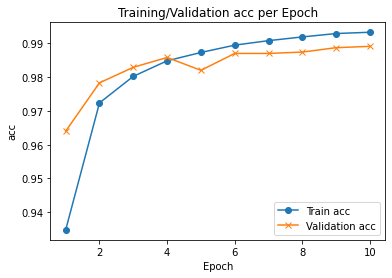

In [14]:
# visualizzazione del processo di addestramento
f, ax = plt.subplots()
ax.plot([None] + hist.history['accuracy'], 'o-')
ax.plot([None] + hist.history['val_accuracy'], 'x-')

# disegno della legenda nella migliore posizione automaticamente: loc = 0.
ax.legend(['Train acc', 'Validation acc'], loc = 0)
ax.set_title('Training/Validation acc per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('acc')